# Customer Segmentation using RFM Analysis

<b>Introduction</b><br>
In this notebook, we will explore an E-commerce dataset. This dataset has details of customers and their purchase history. Having this we will apply RFM model to segment the customers based on their behavioural patterns. Then we will build a model to classify the customers into their segments. This can help plan better personalized ad content for different types of customers.

<b>Content of variables</b><br>
This dataframe contains 8 variables that correspond to:

1) <b>InvoiceNo:</b> Invoice number. Its a assigned  uniquely to each transaction. If this code starts with letter 'c', it indicates a cancellation.<br>
2) <b>StockCode:</b> Product item code. Its assigned uniquely to each distinct product.<br>
3) <b>Description:</b> Product name.<br>
4) <b>Quantity:</b> The quantities of product purchased.<br>
5) <b>InvoiceDate:</b> Invoice Date and time. The date and time when each transaction was generated.<br>
6) <b>UnitPrice:</b> Unit price. Product price per unit in sterling(UK money).<br>
7) <b>CustomerID:</b> Customer ID. Unique ID for customers.<br>
8) <b>Country:</b> Country name. The name of the country where each customer resides.<br>

#### <b>Summary :</b>The Notebook is divided in 4 parts as follow:

1) Pre-Processing<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Classic Cleanup<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Preparing data for analysis<br>
2) Applying RFM<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Calculating RFM values<br>
3) Clustering<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Applying Kmeans<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Interpreting clusters<br>
4) Model Building<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Applying Different classification models<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Evaluation<br>
Conclusion<br>

Now we can start !

<b>Importing pre requisites<b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objs as go

<b>Loading File</b>

In [2]:
df = pd.read_csv('data.csv')

In [3]:
print(df.shape)
df.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


-------------------------------------------------------------------------------------------------------------------------------

# 1- Pre Processing

<b>Check dtype</b> 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.dropna(axis = 0, subset = ['CustomerID'], inplace = True)

In [6]:
df.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int32         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 26.4+ MB


Lets also remove the duplicate entries too

In [9]:
print('Duplicates: {}'.format(df.duplicated().sum()))

Duplicates: 5225


In [10]:
df.drop_duplicates(inplace = True)
df.shape

(401604, 8)

<b>First Analysis<b>

<b>Analysing numerical variables</b>

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


<b>1) Quantity</b>

In [12]:
pos_ords = df[df['Quantity']>0]
neg_ords = df[df['Quantity']<0]

print('Total Positive Orders - ', pos_ords.shape[0])
print('Total Negative Orders - ', neg_ords.shape[0])

Total Positive Orders -  392732
Total Negative Orders -  8872


In [13]:
pos_ords.shape[0]+neg_ords.shape[0] == df.shape[0]

True

In [14]:
print('Number of orders canceled: {}/{} - ({:.2f}%) '.format(neg_ords.shape[0], df.shape[0],
                                                           neg_ords.shape[0]/df.shape[0]*100))

Number of orders canceled: 8872/401604 - (2.21%) 


<b>2) Unit Price</b>

In [15]:
len(df['UnitPrice'].value_counts())

620

<b>3) CustomerID </b>

In [16]:
len(df['CustomerID'].unique())

4372

<br><b>Analysing Categorical variables</b>

In [17]:
df.describe(include='object')

,InvoiceNo,StockCode,Description,Country
count,401604,401604,401604,401604
unique,22190,3684,3896,37
top,576339,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,542,2065,2058,356728


Observation- 
Orders are being placed mostly from UK
'WHITE HANGING HEART T-LIGHT HOLDER' with stockcode - 85123A is the most placed product

<b>4) Country

Lets check country wise Order Count

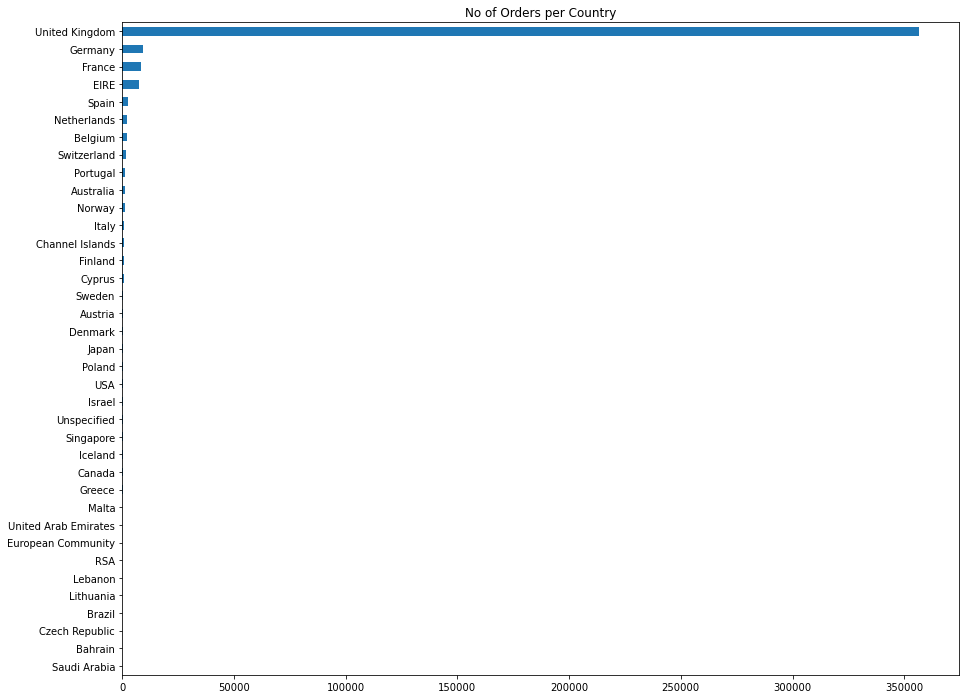

In [18]:
countries_noofOrders = df['Country'].value_counts().sort_values(ascending=True)
countries_noofOrders.plot(kind='barh', figsize=(15,12))
plt.title("No of Orders per Country")
plt.show()

UK has made the majority of the sales. Might be the store is set up in UK & as a result the domestic sales seems high .

<b>5) Invoice No

In [19]:
print(len(df.InvoiceNo.value_counts()))

22190


In [20]:
canc_transactions = len(neg_ords['InvoiceNo'].value_counts())
tot_transactions = len(df['InvoiceNo'].value_counts())

print('Number of orders canceled: {}/{} - ({:.2f}%) '.format(canc_transactions, tot_transactions,
                                                           canc_transactions/tot_transactions*100))

Number of orders canceled: 3654/22190 - (16.47%) 


<b>6&7) StockCode - Description

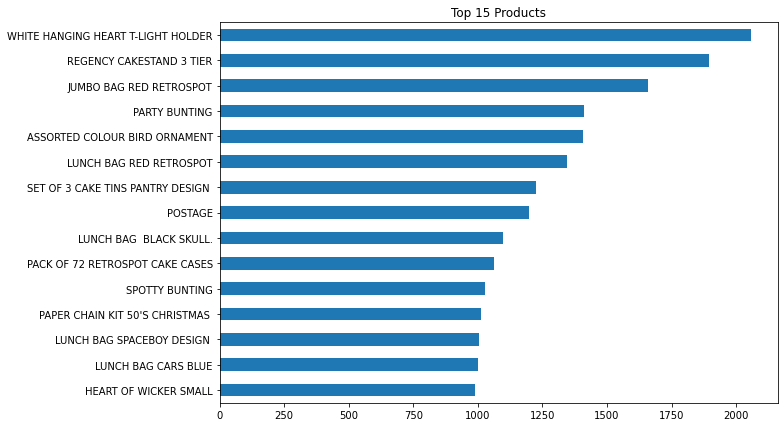

In [21]:
best_sold = df['Description'].value_counts().nlargest(15).sort_values()
best_sold.plot(kind='barh', figsize=(10,7))
plt.title("Top 15 Products")
plt.show()

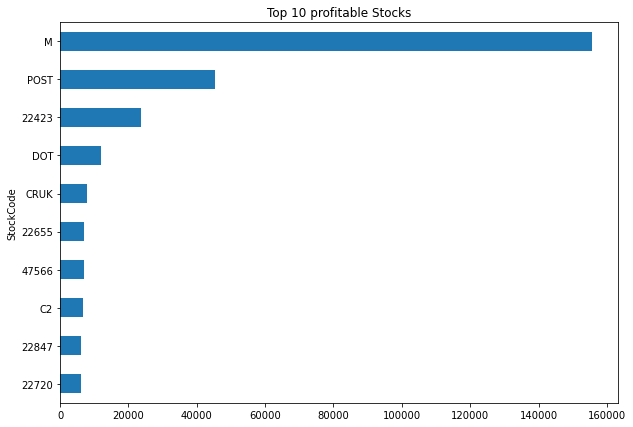

In [22]:
profit_prods = df.groupby(["StockCode"])["UnitPrice"].sum().nlargest(10).sort_values()
profit_prods.plot(kind='barh', figsize=(10,7))
plt.title("Top 10 profitable Stocks")
plt.show()

Lets see what are these M, Post, Dot, Cruk, C2 & does it add on to sales.

In [23]:
stockcodes_list = df[df['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
stockcodes_list

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT', 'CRUK'],
      dtype=object)

In [24]:
for code in stockcodes_list:
    print("{:<15} -> {:<15}".format(code, df[df['StockCode'] == code]['Description'].unique()[0]))

POST            -> POSTAGE        
D               -> Discount       
C2              -> CARRIAGE       
M               -> Manual         
BANK CHARGES    -> Bank Charges   
PADS            -> PADS TO MATCH ALL CUSHIONS
DOT             -> DOTCOM POSTAGE 
CRUK            -> CRUK Commission


In [25]:
df = df[df['StockCode']!= 'POST']
df = df[df['StockCode']!= 'CRUK']
df = df[df['StockCode']!= 'C2']
df = df[df['StockCode']!= 'M']
df = df[df['StockCode']!= 'BANK CHARGES']
df = df[df['StockCode']!= 'PADS']
df = df[df['StockCode']!= 'DOT']

df.shape

(399766, 8)

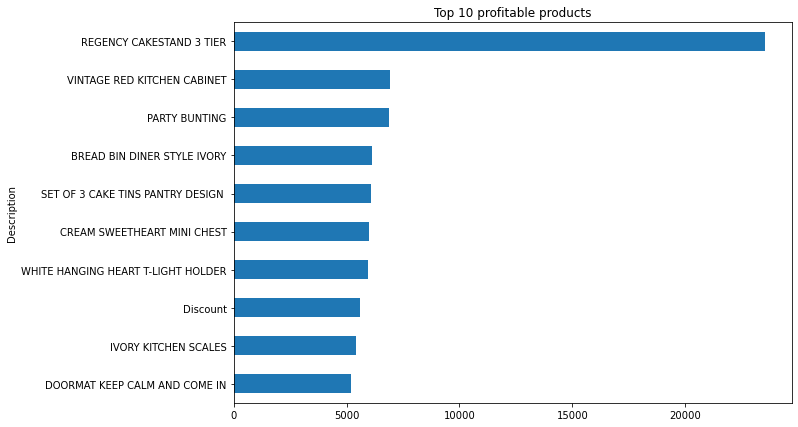

In [26]:
profit_prods = df.groupby(["Description"])["UnitPrice"].sum().nlargest(10).sort_values()
profit_prods.plot(kind='barh', figsize=(10,7))
plt.title("Top 10 profitable products")
plt.show()

<b>8) Invoice Date

In [27]:
print('min invoice date - ',df['InvoiceDate'].min())
print('max invoice date - ',df['InvoiceDate'].max())

min invoice date -  2010-12-01 08:26:00
max invoice date -  2011-12-09 12:50:00


So the dataset is of the period Dec 2010 to Dec 2011

--------------------------------------------------------------------------------------------------------------------------

# Cancelled Orders/ Negative Quantities

When an order is canceled, we have another transactions in the dataframe, mostly identical except for the Quantity and InvoiceDate variables.

In [28]:
neg_ords = df[df['Quantity']<0 ]
neg_ords

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


Negative quantities have a code 'C' appended on the invoiceno, which apparently indicates its a cancelled order

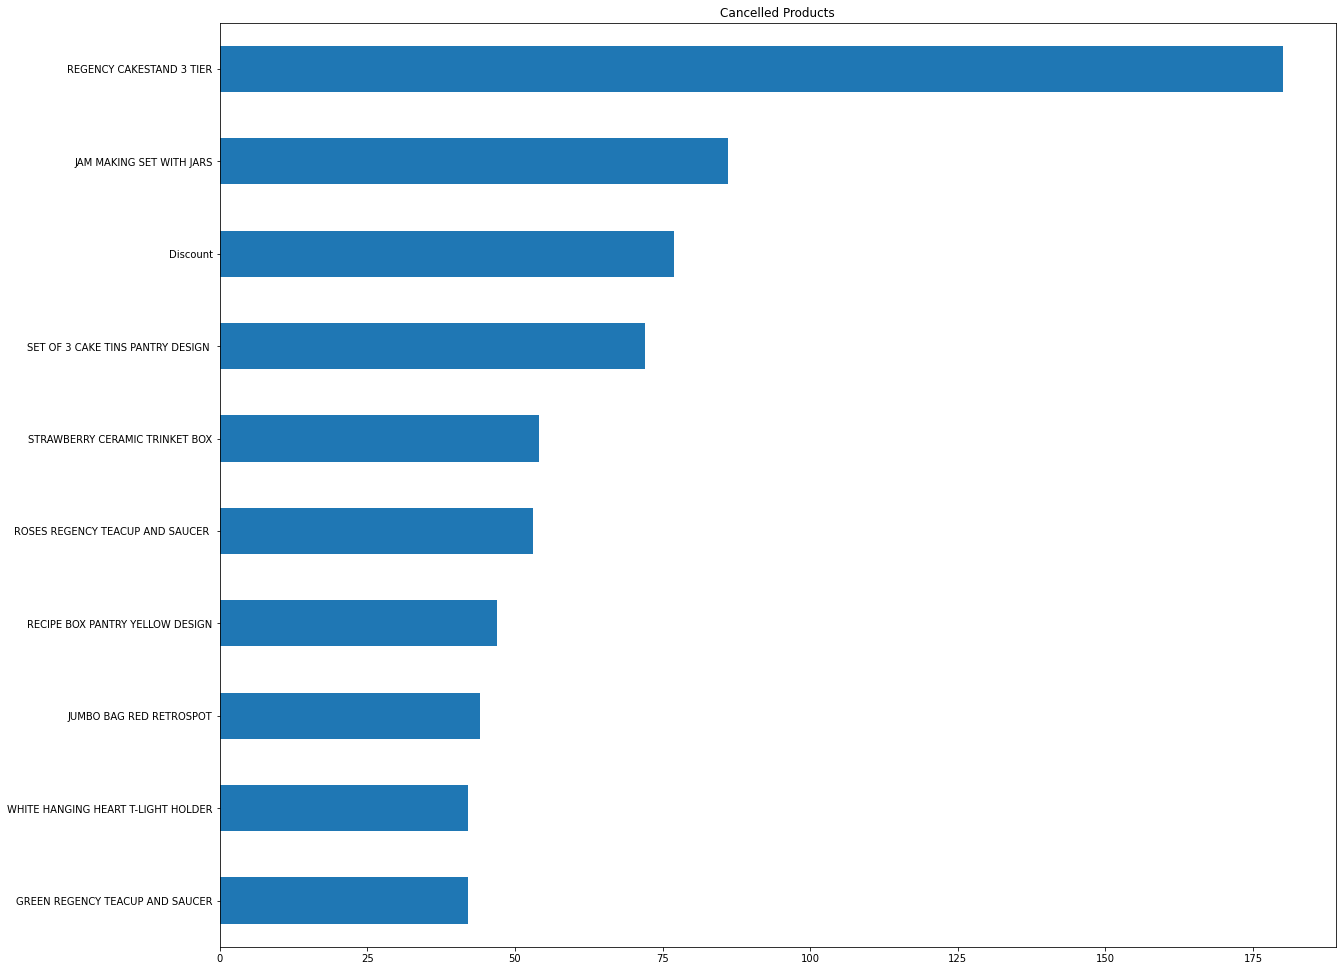

In [29]:
canc_prods = neg_ords['Description'].value_counts().nlargest(10).sort_values()
canc_prods.plot(kind='barh', figsize=(20,17))
plt.title("Cancelled Products")
plt.show()

<b>Updating Cancelled quantities on its counterpart record</b>


There are 2 steps for this

firstly create 2 variables 'Cancelled' & 'QuantityCanceled'

1) - mark a record as cancelled if its a cancellation entry
     
2) - We have to update whats the cancelled quantity. This tells us out of n no of orders placed, how many were cancelled. We do this by locating the entries that indicate a negative quantity and check if there is systematically an order with the same narrative except for quantity & invoicedate. If there is, it has counterpart, update the cancelled quantity for the record. If no counterpart then the buy orders were performed before Dec-2010, the point of entry of the database. So we will get rid of them.

<b>Step 1:

In [30]:
df["Cancelled"] = df["InvoiceNo"].str.startswith("C")
df["Cancelled"] = df["Cancelled"].fillna(False)

In [31]:
df['QuantityCanceled'] = 0

In [32]:
df.reset_index(drop=True, inplace=True)

<b>Step 2:

In [33]:
no_counterpart=[]
has_counterpart =[]
loop = 0
for idx, n_ord in df.iterrows():
    if n_ord['Cancelled'] == True:
        df_tst = df[(n_ord['CustomerID'] == df['CustomerID']) &
                    (df['Cancelled'] == False) &
                    (n_ord['Quantity'] !=  df['Quantity']) &
                    (n_ord['StockCode'] == df['StockCode'])].copy()
        shape = df_tst.shape[0]
                
        if (shape == 0):
            no_counterpart.append(idx)
            
        if (shape == 1):
            index_order = df_tst.index[0]
            df.loc[index_order, 'QuantityCanceled'] = -n_ord['Quantity']
            has_counterpart.append(idx)
            
        if (shape > 1): 
            df_tst.sort_index(axis=0 ,ascending=False, inplace = True)  
            
            for idx, val in df_tst.iterrows():
                if val['Quantity'] < -n_ord['Quantity']: continue
                df.loc[idx, 'QuantityCanceled'] = -n_ord['Quantity']
                has_counterpart.append(idx) 
                break  

In [34]:
df.drop(no_counterpart, axis = 0, errors='ignore', inplace = True)

In [35]:
df.drop(has_counterpart, axis = 0, errors='ignore', inplace = True)

In [36]:
to_be_deleted = df[(df['Cancelled'] == True)]
df.drop(to_be_deleted.index, axis = 0, inplace = True)

To check if there are any outliers quantities

In [38]:
print(df[df['Quantity']>1000].shape)
print(df[df['Quantity']>2000].shape)
print(df[df['Quantity']>3000].shape)
print(df[df['Quantity']>4000].shape)
print(df[df['Quantity']>5000].shape)

(95, 10)
(19, 10)
(7, 10)
(4, 10)
(3, 10)


In [43]:
print(df[df['Quantity']>300].shape)
print(df[df['Quantity']>400].shape)
print(df[df['Quantity']>500].shape)
print(df[df['Quantity']>600].shape)
print(df[df['Quantity']>700].shape)
print(df[df['Quantity']>800].shape)
print(df[df['Quantity']>900].shape)

(804, 10)
(594, 10)
(377, 10)
(231, 10)
(197, 10)
(145, 10)
(124, 10)


In [44]:
df = df[df['Quantity']<600]
df.shape

(387624, 10)

If price of product is 0 this wont help us analyse sales even if there are large orders. So lets drop them

In [45]:
df[(df['UnitPrice'] == 0)].shape

(28, 10)

In [46]:
df = df[df['UnitPrice'] > 0]
df.shape

(387596, 10)

In [47]:
def unique_counts(df):
    for i in df.columns:
        count = df[i].nunique()
        print(i, ": ", count)
unique_counts(df)

InvoiceNo :  18232
StockCode :  3657
Description :  3869
Quantity :  206
InvoiceDate :  17020
UnitPrice :  348
CustomerID :  4322
Country :  37
Cancelled :  1
QuantityCanceled :  68


<b>Updating Total Price:</b><br>
    Total Price = UnitPrice * (Ordered Quantity - Cancelled Quantity)

In [48]:
df['TotalPrice'] = df['UnitPrice'] * (df['Quantity'] - df['QuantityCanceled'])
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled,QuantityCanceled,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,False,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,False,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,0,20.34
...,...,...,...,...,...,...,...,...,...,...,...
399761,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,False,0,10.20
399762,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,False,0,12.60
399763,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,False,0,16.60
399764,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,False,0,16.60


cross checking

In [49]:
df['QuantityCanceled'].unique()

array([  0,   1,  27,   2,   6,  20,  10,  36,   4,  24,   3,  15,  42,
        25,  32,  12,   8,  80,   9,  48,   5,  96,  40, 240,   7,  14,
       120,  60,  30,  50,  72, 100,  16, 144,  17,  11,  23,  18, 200,
        13,  51,  46,  22,  58, 408,  31, 250,  53,  82,  70,  21, 288,
        66, 108,  19,  39,  68,  35,  37, 360, 432,  79,  67, 312, 110,
       130, 220, 180], dtype=int64)

In [113]:
df[df['QuantityCanceled']==180]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalPrice,recency,frequency,monetary
148120,574319,85036C,ROSE 1 WICK MORRIS BOXED CANDLE,180,2011-11-03 19:15:00,1.0,15482,35,180,0.0,16.0,11,7310.36


In [51]:
df[(df['Quantity'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled,QuantityCanceled,TotalPrice


--------------------------------------------------------------------------------------------------------------------------

<b> Label encoding

Converting Country into numeric form to make them machine-readable

In [52]:
noof_countries = len(df['Country'].unique())
noof_countries

37

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Country'])
df['Country'] = le.transform(df['Country'])

In [54]:
codes = [i for i in range(noof_countries)]
dict(zip(list(le.classes_), codes))

{'Australia': 0,
 'Austria': 1,
 'Bahrain': 2,
 'Belgium': 3,
 'Brazil': 4,
 'Canada': 5,
 'Channel Islands': 6,
 'Cyprus': 7,
 'Czech Republic': 8,
 'Denmark': 9,
 'EIRE': 10,
 'European Community': 11,
 'Finland': 12,
 'France': 13,
 'Germany': 14,
 'Greece': 15,
 'Iceland': 16,
 'Israel': 17,
 'Italy': 18,
 'Japan': 19,
 'Lebanon': 20,
 'Lithuania': 21,
 'Malta': 22,
 'Netherlands': 23,
 'Norway': 24,
 'Poland': 25,
 'Portugal': 26,
 'RSA': 27,
 'Saudi Arabia': 28,
 'Singapore': 29,
 'Spain': 30,
 'Sweden': 31,
 'Switzerland': 32,
 'USA': 33,
 'United Arab Emirates': 34,
 'United Kingdom': 35,
 'Unspecified': 36}

In [55]:
df.shape

(387596, 11)

Now our dataset is ready!

--------------------------------------------------------------------------------------------------------------------------------

# 2-  RFM (Recency, Frequency, Monetory)


Source : https://towardsdatascience.com/simple-customer-segmentation-using-rfm-analysis-1ccee2b6d8b9
<br>   
RFM analysis is a customer behavior segmentation technique. Based on customers’ historical transactions, RFM analysis focuses on 3 main aspects of customers’ transactions: recency, frequency and purchase amount. Understanding these behaviors will help us to cluster customers into different groups.

<b>Definition of RFM:

Recency (R):</b> How recently customers have made their purchases.<br>
<b>Frequency (F):</b> How often customers have made their purchases.<br>
<b>Monetary (M):</b> How much money customers have paid for their purchases.<br>


<b>Lets calculate these 3 components for each of the customers.

Aggregate the data on the InvoiceNo

In [56]:
custom_aggregation = {}
custom_aggregation["InvoiceDate"] = lambda x:x.iloc[0]
custom_aggregation["CustomerID"] = lambda x:x.iloc[0]
custom_aggregation["TotalPrice"] = "sum"
# custom_aggregation["StockCode"] = lambda x:x.iloc[0]

A dictionary has been created which has functions to fetch the first occuring record

In [57]:
rfm_table = df.groupby("InvoiceNo").agg(custom_aggregation)
print(rfm_table.shape)
rfm_table.head()

(18232, 3)


,InvoiceDate,CustomerID,TotalPrice
InvoiceNo,,,
536365,2010-12-01 08:26:00,17850,139.12
536366,2010-12-01 08:28:00,17850,22.20
536367,2010-12-01 08:34:00,13047,278.73
536368,2010-12-01 08:34:00,13047,70.05
536369,2010-12-01 08:35:00,13047,17.85


To calculate recency, we will be taking one day after the last invoice date(2011-12-09) of our data set as the snapshot date ‘2011–12–10’. The date difference will give us how recent the last transaction was made.

In [58]:
import datetime
last_date = df["InvoiceDate"].max()
super_date = last_date + datetime.timedelta(days=1)
super_date

Timestamp('2011-12-10 12:50:00')

In [59]:
rfm_table["Recency"] = super_date - rfm_table["InvoiceDate"]
rfm_table["Recency"] = pd.to_timedelta(rfm_table["Recency"]).astype("timedelta64[D]")
rfm_table.head(3)

,InvoiceDate,CustomerID,TotalPrice,Recency
InvoiceNo,,,,
536365,2010-12-01 08:26:00,17850,139.12,374.0
536366,2010-12-01 08:28:00,17850,22.20,374.0
536367,2010-12-01 08:34:00,13047,278.73,374.0


Aggregate the data on the Customer level to calculate min recency, max recency, frequency & monetory

In [60]:
custom_aggregation = {}

custom_aggregation["Recency"] = ["min"]
custom_aggregation["InvoiceDate"] = "count"
custom_aggregation["TotalPrice"] = "sum"

In [61]:
rfm_table = rfm_table.groupby("CustomerID").agg(custom_aggregation)

In [62]:
rfm_table.columns = ["recency", "frequency", "monetary"]
rfm_table

,recency,frequency,monetary
CustomerID,,,
12347,2.0,7,4310.00
12348,75.0,4,1437.24
12349,19.0,1,1457.55
12350,310.0,1,294.40
12352,36.0,6,1265.41
...,...,...,...
18280,278.0,1,180.60
18281,181.0,1,80.82
18282,8.0,2,176.60


Applying RFM rule to the data frame:

# Lets group our customers by their RFM level.

In [63]:
df.shape

(387596, 11)

The two tables are merged & the join is done on CustomerID. 

In [64]:
df = pd.merge(df,rfm_table, on='CustomerID')

In [65]:
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancelled,QuantityCanceled,TotalPrice,recency,frequency,monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,35,False,0,15.30,372.0,34,5233.23
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,35,False,0,20.34,372.0,34,5233.23
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,35,False,0,22.00,372.0,34,5233.23


In [66]:
df.drop(columns=['Cancelled'], inplace=True)

In [67]:
df_rfm = df.copy(deep = True)

We want to analyse the customers so we will aggregate it on invoiceno first & then on customerID

In [68]:
custom_aggregation = {}
custom_aggregation["TotalPrice"] = "sum"
custom_aggregation["recency"] = "min"
custom_aggregation["frequency"] = "max"
custom_aggregation["monetary"] = "sum"
custom_aggregation["CustomerID"] = lambda x:x.iloc[0]
custom_aggregation["Quantity"] = "sum"
custom_aggregation["Country"] = lambda x:x.iloc[0]

df_rfm = df_rfm.groupby("InvoiceNo").agg(custom_aggregation)

In [69]:
custom_aggregation = {}
custom_aggregation["TotalPrice"] = ['min','max','mean']
custom_aggregation["recency"] = "min"
custom_aggregation["frequency"] = "max"
custom_aggregation["monetary"] = "sum"
custom_aggregation["Quantity"] = "sum"
custom_aggregation["Country"] = lambda x:x.iloc[0]

df_rfm = df_rfm.groupby("CustomerID").agg(custom_aggregation)

In [70]:
df_rfm.head(3)

TotalPrice                       recency frequency   monetary  \
                  min      max         mean     min       max        sum   
CustomerID                                                                 
12347          224.82  1294.32   615.714286     2.0         7  784420.00   
12348          187.44   652.80   359.310000    75.0         4   38805.48   
12349         1457.55  1457.55  1457.550000    19.0         1  104943.60   

           Quantity  Country  
                sum <lambda>  
CustomerID                    
12347          2458       16  
12348          2332       12  
12349           630       18

In [71]:
df_rfm.columns = ["min_price", "max_price", "mean_price", "recency", "frequency", "monetary", "quantity", "country"]
df_rfm.head(3)

,min_price,max_price,mean_price,recency,frequency,monetary,quantity,country
CustomerID,,,,,,,,
12347,224.82,1294.32,615.714286,2.0,7,784420.00,2458,16
12348,187.44,652.80,359.310000,75.0,4,38805.48,2332,12
12349,1457.55,1457.55,1457.550000,19.0,1,104943.60,630,18


Now that we have our RFM table ready, we will apply clustering on it

-----------------------------------------------------------------------------------------------------------------------------

# 3- Clustering

We will cluster the customers using Kmeans

In [72]:
#scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X= scaler.fit_transform(df_rfm)

<b>Kmeans

In [73]:
# applying kmeans clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

x = list(range(2, 12))
y_std = []
for n_clusters in x:
    print("n_clusters =", n_clusters)
    
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(scaled_X)
    clusters = kmeans.predict(scaled_X)
    silhouette_avg = silhouette_score(scaled_X, clusters)
    y_std.append(silhouette_avg)
    print("The average silhouette_score is :", silhouette_avg, "with Std Scaling")

n_clusters = 2
The average silhouette_score is : 0.9056829449562013 with Std Scaling
n_clusters = 3
The average silhouette_score is : 0.6103083629901963 with Std Scaling
n_clusters = 4
The average silhouette_score is : 0.39136970226736073 with Std Scaling
n_clusters = 5
The average silhouette_score is : 0.39723609261810316 with Std Scaling
n_clusters = 6
The average silhouette_score is : 0.41513645614566624 with Std Scaling
n_clusters = 7
The average silhouette_score is : 0.4302089082103798 with Std Scaling
n_clusters = 8
The average silhouette_score is : 0.44172317253438104 with Std Scaling
n_clusters = 9
The average silhouette_score is : 0.4345216204418801 with Std Scaling
n_clusters = 10
The average silhouette_score is : 0.434895000152003 with Std Scaling
n_clusters = 11
The average silhouette_score is : 0.43503062302119755 with Std Scaling


In [74]:
kmeans = KMeans(init='k-means++', n_clusters = 4, n_init=30, random_state=10)  # random state just to be able to provide cluster number durint analysis
kmeans.fit(scaled_X)
clusters = kmeans.predict(scaled_X)

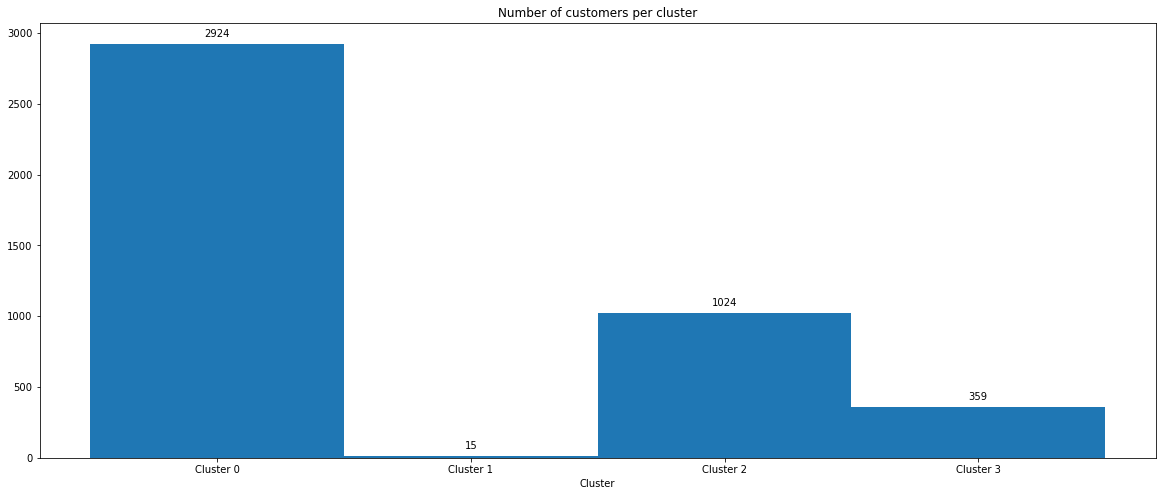

In [75]:
#plotting clusters
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(clusters, bins=4)
plt.xlabel("Cluster")
plt.title("Number of customers per cluster")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Cluster {}".format(x) for x in range(4)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

In [76]:
df_rfm["cluster"] = clusters

In [77]:
df_rfm["cluster"].value_counts()

0    2924
2    1024
3     359
1      15
Name: cluster, dtype: int64

<b>Interpreting Clusters with TSNE 

In [78]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3)
proj = tsne.fit_transform(scaled_X)
proj.shape

(4322, 3)

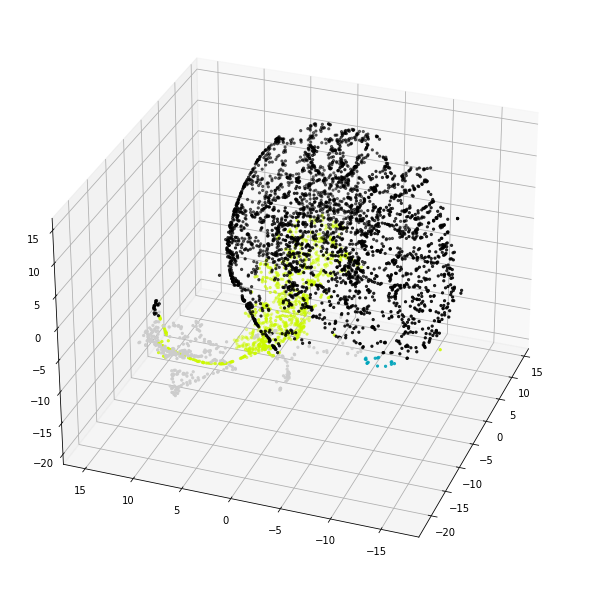

In [79]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
ax.scatter(proj[:,0], proj[:,1], proj[:,2], c=clusters, marker='.', cmap='nipy_spectral')
ax.view_init(azim=200)
plt.show()

In [80]:
custom_aggregation = {}
custom_aggregation["min_price"] = 'mean'
custom_aggregation["max_price"] = 'mean'
custom_aggregation["mean_price"] = 'mean'
custom_aggregation["recency"] = 'mean'
custom_aggregation["frequency"] = 'mean'
custom_aggregation["monetary"] = 'mean'
custom_aggregation["quantity"] = 'mean'
custom_aggregation["country"] = lambda x:x.mode().iloc[0]

df_cluster = df_rfm.groupby("cluster").agg(custom_aggregation)
df_cluster

,min_price,max_price,mean_price,recency,frequency,monetary,quantity,country
cluster,,,,,,,,
0,196.035906,517.489118,328.678479,40.516758,4.850205,3.834796e+05,1025.020520,35
1,34.008000,9655.016667,2094.743425,5.133333,75.066667,1.832195e+08,55184.866667,35
2,231.088564,295.883623,261.982101,245.098633,1.562500,1.947009e+04,221.055664,35
3,572.591811,1070.054986,785.988878,88.557103,3.688022,5.589762e+05,1467.211699,14


<AxesSubplot:title={'center':'Recency'}, xlabel='cluster'>

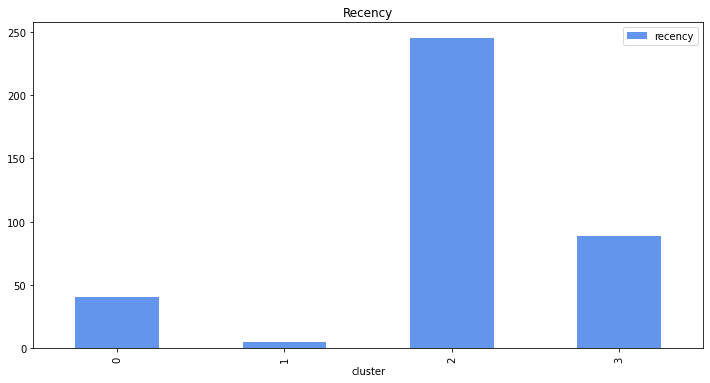

In [81]:
plt.rcParams["figure.figsize"] = [12, 6]
df_cluster[['recency']].plot.bar(color=['cornflowerblue'], title='Recency')

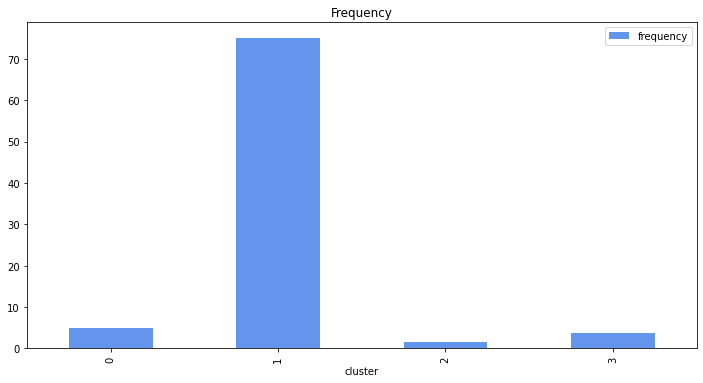

In [82]:
ax = df_cluster[['frequency']].plot.bar(color=['cornflowerblue'], title='Frequency')

<AxesSubplot:title={'center':'Mean Monetory'}, xlabel='cluster'>

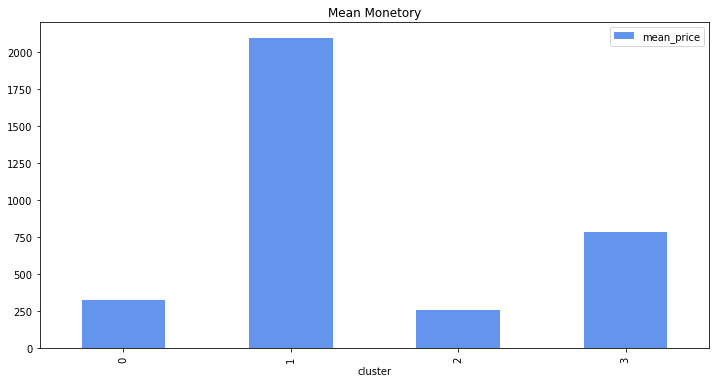

In [83]:
df_cluster[['mean_price']].plot.bar(color=['cornflowerblue'], title='Mean Monetory')

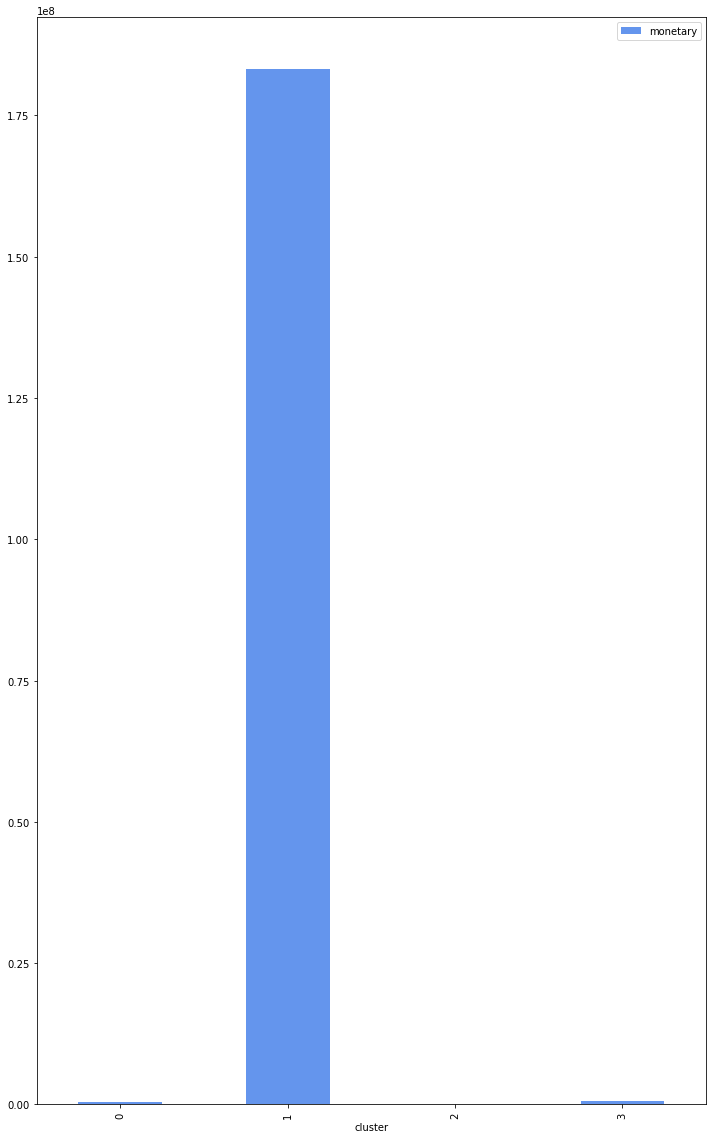

In [84]:
plt.rcParams["figure.figsize"] = [12, 20]
ax = df_cluster[['monetary']].plot.bar(color=['cornflowerblue'])

-----------------------------------------------------------------------------------------------------------------------------

# 4- Model Building 

In [85]:
from sklearn import preprocessing, model_selection, metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, learning_curve

In [86]:
y = df_rfm["cluster"]
X = df_rfm.drop(columns=["cluster"])

In [87]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, train_size = 0.8)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3457, 8)
(3457,)
(865, 8)
(865,)


Defining functions

In [88]:
class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, self.predictions)))
        

In [89]:
min_samples_split = 4 
cv = 5
n_estimators = 40

In [90]:
plt.rcParams["figure.figsize"] = [5, 5]
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<b>SVM

In [91]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

svc = Class_Fit(clf = svm.LinearSVC)
svc.grid_search(parameters = [{'C':np.logspace(-2,2,10)}], Kfold = 5)

In [92]:
svc.grid_fit(X = X_train, Y = Y_train)
svc.grid_predict(X_test, Y_test)

Precision: 49.83 % 


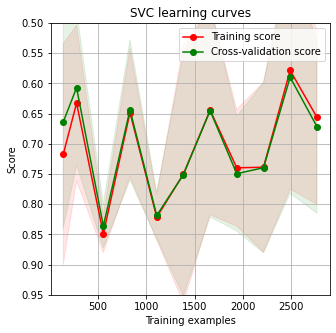

In [110]:
g = plot_learning_curve(svc.grid.best_estimator_,
                        "SVC learning curves", X_train, Y_train, ylim = [.95, 0.5],
                        cv = 5,  train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                                0.6, 0.7, 0.8, 0.9, 1])

<b>Logistic Regression

In [94]:
from sklearn import linear_model, ensemble, neighbors

lr = Class_Fit(clf = linear_model.LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-2,2,20)}], Kfold = 5)
lr.grid_fit(X = X_train, Y = Y_train)
lr.grid_predict(X_test, Y_test)

Precision: 81.85 % 


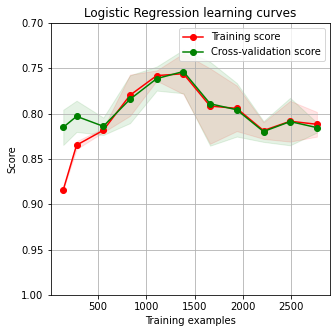

In [95]:
g = plot_learning_curve(lr.grid.best_estimator_, "Logistic Regression learning curves", X_train, Y_train,
                        ylim = [1.0, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

<b>KNN

In [96]:
knn = Class_Fit(clf = neighbors.KNeighborsClassifier)
knn.grid_search(parameters = [{'n_neighbors': np.arange(1,50,1)}], Kfold = 5)
knn.grid_fit(X = X_train, Y = Y_train)
knn.grid_predict(X_test, Y_test)

Precision: 81.50 % 


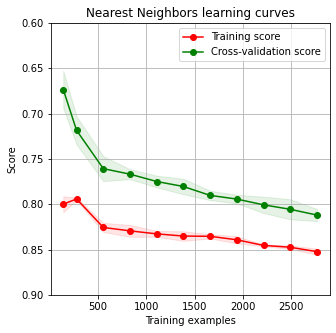

In [111]:
g = plot_learning_curve(knn.grid.best_estimator_, "Nearest Neighbors learning curves", X_train, Y_train,
                        ylim = [.90, 0.6], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

<b>Decision Tree

In [98]:
from sklearn import tree
tr = Class_Fit(clf = tree.DecisionTreeClassifier)
tr.grid_search(parameters = [{'criterion' : ['entropy', 'gini'], 'max_features' :['sqrt', 'log2']}], Kfold = 5)
tr.grid_fit(X = X_train, Y = Y_train)
tr.grid_predict(X_test, Y_test)

Precision: 97.92 % 


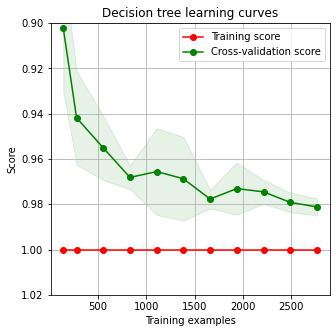

In [99]:
g = plot_learning_curve(tr.grid.best_estimator_, "Decision tree learning curves", X_train, Y_train,
                        ylim = [1.02, 0.9], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

<b>Random Forest

In [100]:
rf = Class_Fit(clf = ensemble.RandomForestClassifier)
param_grid = {'criterion' : ['entropy', 'gini'], 'n_estimators' : [20, 40, 60, 80, 100],
               'max_features' :['sqrt', 'log2']}
rf.grid_search(parameters = param_grid, Kfold = 5)
rf.grid_fit(X = X_train, Y = Y_train)
rf.grid_predict(X_test, Y_test)

Precision: 98.84 % 


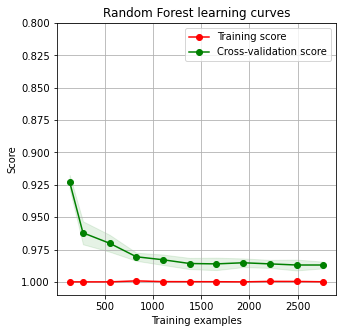

In [112]:
g = plot_learning_curve(rf.grid.best_estimator_, "Random Forest learning curves", X_train, Y_train,
                        ylim = [1.01, 0.8], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

<b>Ada Boost

In [102]:
from sklearn.ensemble import AdaBoostClassifier
ada = Class_Fit(clf = AdaBoostClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
ada.grid_search(parameters = param_grid, Kfold = 5)
ada.grid_fit(X = X_train, Y = Y_train)
ada.grid_predict(X_test, Y_test)

Precision: 95.95 % 


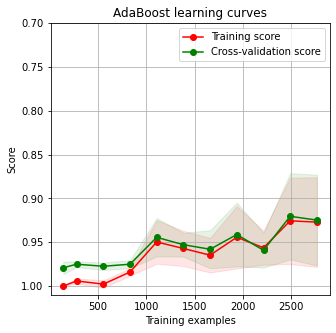

In [103]:
g = plot_learning_curve(ada.grid.best_estimator_, "AdaBoost learning curves", X_train, Y_train,
                        ylim = [1.01, 0.7], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

<b>Gradient Boosting

In [104]:
gb = Class_Fit(clf = ensemble.GradientBoostingClassifier)
param_grid = {'n_estimators' : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
gb.grid_search(parameters = param_grid, Kfold = 5)
gb.grid_fit(X = X_train, Y = Y_train)
gb.grid_predict(X_test, Y_test)

Precision: 99.08 % 


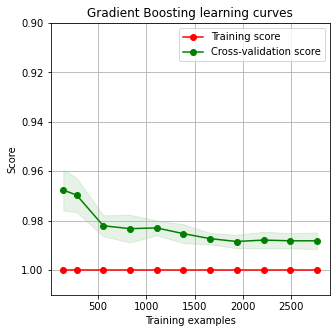

In [105]:
g = plot_learning_curve(gb.grid.best_estimator_, "Gradient Boosting learning curves", X_train, Y_train,
                        ylim = [1.01, 0.9], cv = 5, 
                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

<b>Voting Classifier</b>
A Voting Classifier trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output. It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting.  

In [106]:
rf_best  = ensemble.RandomForestClassifier(**rf.grid.best_params_)
gb_best  = ensemble.GradientBoostingClassifier(**gb.grid.best_params_)
svc_best = svm.LinearSVC(**svc.grid.best_params_)
dt_best  = tree.DecisionTreeClassifier(**tr.grid.best_params_)
knn_best = neighbors.KNeighborsClassifier(**knn.grid.best_params_)
lr_best  = linear_model.LogisticRegression(**lr.grid.best_params_)
ada_best  = ensemble.AdaBoostClassifier(**ada.grid.best_params_)

In [107]:
votingC = ensemble.VotingClassifier(estimators=[('rf', rf_best),('gb', gb_best), ('dt', dt_best),
                                                ('knn', knn_best)], voting='soft')    

In [108]:
votingC = votingC.fit(X_train, Y_train)

In [109]:
predictions = votingC.predict(X_test)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y_test, predictions)))

Precision: 99.31 % 


<b>Conclusion